-----

<h1 align="center"> Data Analysis </h1><br>
This notebook explores the provided crop and livestock predicts from FAOSTAT. Scatterplots were generated comparing disease mortality rates per 100,000 and food item consumption in kg/capita/year. This analysis was extended for cancer, diabetes, and cardiovascular disease and over 100 predictors were examined. The top positively and negatively correlated predictors are printed below.

-----

In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pandas as pd
import math
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score as val_score
from sklearn.linear_model import LinearRegression as LinReg
import missingno as msno
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split as sk_split
import statsmodels.api as sm
import pycountry
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

%matplotlib inline

In [2]:
allcrops_2000 = pd.read_csv('datasets/allcrops_2000.csv')
# names of all the crops
crop_names = allcrops_2000['Item'].unique()

# remove nan
crop_names = crop_names[:-1]
# list to put our separated crop dataframes
all_crop_dfs = []

# find each crop-separated df and put it in the list of dataframes
for crop in crop_names:
    crop_df = allcrops_2000[(allcrops_2000['Item'] == crop)]
    all_crop_dfs.append(crop_df)

In [3]:
# Do the same as above, but for livestock
livestock_2000 = pd.read_csv('datasets/livestock_2000.csv')
# list of livestock names
livestock_names = livestock_2000['Item'].unique()
livestock_names = livestock_names[:-1]

# list to put our separated dataframes
livestock_dfs = []

# separate dataframe based on itemname
for crop in livestock_names:
    crop_df = livestock_2000[(livestock_2000['Item'] == crop)]
    livestock_dfs.append(crop_df)

In [4]:
# read in disease rates
column_headers = ["Country", "Year", "Mortality", "Mortality 2", "Mortality 3"]
diabetes = pd.read_csv('datasets/diabetes.csv', names = column_headers)
cardio = pd.read_csv('datasets/cardiovascular.csv', names = column_headers)
cancer= pd.read_csv('datasets/Cancer.csv', names = column_headers)

In [5]:
# separate out 2000 and 2010 values
cardio_2012 = cardio[(cardio["Year"] == "2012")] 
cardio_2000 = cardio[(cardio["Year"] == "2000")] 
diabetes_2012 = diabetes[(diabetes['Year'] == '2012')] 
diabetes_2000 = diabetes[(diabetes['Year'] == '2000')] 
cancer_2012 = cancer[(cancer['Year'] == ' 2012')] 
cancer_2000 = cancer[(cancer['Year'] == ' 2000')] 

# Actual and Predicted Mortality Rates World Map

In [66]:
country_names = pd.read_csv('datasets/country_names.csv')
cancer = pd.read_csv('datasets/cancer.csv')
diabetes = pd.read_csv('datasets/diabetes.csv')
cardio = pd.read_csv('datasets/cardio.csv')

In [67]:
print len(country_names)
print len(cancer)
print len(diabetes)
print len(cardio)

150
150
150
150


In [68]:
full_dataset = np.column_stack((country_names, cancer, diabetes, cardio))
full_dataset = np.sort(full_dataset, axis=0, kind='quicksort', order=None)
country_names = full_dataset[:,0]

In [69]:
def change_names(country_names):
    input_countries = country_names
    counter = 1
    for each in range(1, len(input_countries)):
        if input_countries[counter] == 'Bolivia (Plurinational State of)':
            input_countries[counter] = 'Bolivia, Plurinational State of'
        if input_countries[counter] == 'Iran (Islamic Republic of)':
            input_countries[counter] = 'Iran, Islamic Republic of'
        if input_countries[counter] == "C\xc3\xb4te d'Ivoire":
            input_countries[counter] = 'Cote d\'Ivoire'
        if input_countries[counter] == 'China, Macao SAR':
            input_countries[counter] = 'Macao'
        if input_countries[counter] == "Democratic People's Republic of Korea":
            input_countries[counter] = 'Korea, Democratic People\'s Republic of'
        if input_countries[counter] == 'Republic of Korea':
            input_countries[counter] = 'Korea, Republic of'
        if input_countries[counter] == 'The former Yugoslav Republic of Macedonia':
            input_countries[counter] = 'Macedonia, Republic of'
        if input_countries[counter] == 'Sudan (former)':
            input_countries[counter] = 'Sudan'
        if input_countries[counter] == 'Venezuela (Bolivarian Republic of)':
            input_countries[counter] = 'Venezuela, Bolivarian Republic of'
        if input_countries[counter] == 'United States of America':
            input_countries[counter] = 'United States'
        if input_countries[counter] == 'China, Taiwan Province of':
            input_countries[counter] = 'Taiwan, Province of China'
        if input_countries[counter] == 'China, mainland':
            input_countries[counter] = 'China'
        if input_countries[counter] == 'China, Hong Kong SAR':
            input_countries[counter] = 'Hong Kong'
        if input_countries[counter] == 'Republic of Moldova':
            input_countries[counter] = 'Moldova, Republic of'
        if input_countries[counter] == 'United Republic of Tanzania':
            input_countries[counter] = 'Tanzania, United Republic of'
        if input_countries[counter] == 'Czechia':
            input_countries[counter] = 'Czechoslovakia'
        if input_countries[counter] == 'Netherlands Antilles':
            input_countries[counter] = 'Netherlands'
        if input_countries[counter] == 'Cabo Verde':
            input_countries[counter] = 'Cabo Verde, Republic of'
        counter = counter + 1

In [70]:
change_names(country_names)
country_names

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bolivia, Plurinational State of', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde, Republic of', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       "Korea, Democratic People's Republic of", 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of',
       'Iraq', 'Ireland', 'Israel', 

In [71]:
# create array of countries to convert country name to 3 letter Alpha code
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha3

# iterate through all countries and compile list of codes, return unknown if no code is present
codes = [countries.get(country, country) for country in country_names]

In [76]:
def world_map(disease, dataset, number):
    # score disease data as floats
    disease_rates = dataset[:,number]
    float_disease_array = []
    for index, value in enumerate(disease_rates):
        if value < 0: 
            disease_rates[index] = 0
            float_disease_array.append(0)
        else:
            float_disease_array.append(float(value))
            
    # find maximum value for normalization
    max_value = np.max(float_disease_array) + 1
    
    # plot cartopy world map projection
    # ax = plt.axes(projection=ccrs.PlateCarree())
    fig, ax = plt.subplots(figsize=(12,6), 
                           subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([-150, 60, -25, 60])

    # initialize the type of projdction and map outline format
    shpfilename = shpreader.natural_earth(resolution='110m',
                                          category='cultural',
                                          name='admin_0_countries')
    reader = shpreader.Reader(shpfilename)
    countries = reader.records()

    # initialize counter variable k 
    k = 0
    for country in countries:

        # for each country with a country code, color the country in proportion to the cardiovascular mortality rate
        if any(country.attributes['adm0_a3'] in j for (k,j) in enumerate(codes)):
            ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                              facecolor=[0, 1-(float(dataset[k,number])/max_value), 1],
                              label=country.attributes['adm0_a3'])
            k = k + 1

        # color Greenland the same as Iceland
        elif country.attributes['adm0_a3'] == 'GRL':
            ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                              facecolor=[0, 1-(float(dataset[k,number])/max_value), 1],
                              label=country.attributes['adm0_a3'])

        # for all countries with no cardiovascular mortality data, make the country gray
        else:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                              facecolor = [0.8, 0.8, 0.8],
                              label=country.attributes['adm0_a3'])
        ax.set_title('Predicted ' + str(disease) + ' Disease Incidence Rate by Country')

        cmap = plt.cm.Blues
        cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
        norm = mpl.colors.Normalize(vmin=0, vmax=max_value)
        cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, spacing='proportional')
        cb.set_label(str(disease) + ' Mortality per Capita')

    plt.show()

In [77]:
cancer_2000[["Country", "Mortality"]]
cancer_rates = cancer_2000["Mortality"].as_matrix()
country_list_actual = cancer_2000["Country"].as_matrix()
change_names(country_list_actual)
cancer_full = np.column_stack((country_list_actual, cancer_rates))

In [78]:
def world_map_actual(disease_rates, disease, dataset):
    float_disease_array = []
    for each in disease_rates:
        float_disease_array.append(float(each))
    max_value = np.max(float_disease_array) + 1
    
    # plot cartopy world map projection
    # ax = plt.axes(projection=ccrs.PlateCarree())
    fig, ax = plt.subplots(figsize=(12,6), 
                           subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([-150, 60, -25, 60])

    # initialize the type of projdction and map outline format
    shpfilename = shpreader.natural_earth(resolution='110m',
                                          category='cultural',
                                          name='admin_0_countries')
    reader = shpreader.Reader(shpfilename)
    countries = reader.records()

    # initialize counter variable k 
    k = 0
    for country in countries:

        # for each country with a country code, color the country in proportion to the cardiovascular mortality rate
        if any(country.attributes['adm0_a3'] in j for (k,j) in enumerate(codes)):
            ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                              facecolor=[0, 1-(float(dataset[k,1])/max_value), 1],
                              label=country.attributes['adm0_a3'])
            k = k + 1

        # since USA has a unique format, append the USA's separate mortality index
        elif country.attributes['adm0_a3'] == 'GRL':
            ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                              facecolor=[0, 1-(float(dataset[k,1])/max_value), 1],
                              label=country.attributes['adm0_a3'])

        # for all countries with no cardiovascular mortality data, leave the country blank
        else:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                              facecolor = [0.8, 0.8, 0.8],
                              label=country.attributes['adm0_a3'])
        ax.set_title('Actual ' + str(disease) + ' Disease Incidence Rate by Country')

        cmap = plt.cm.Blues
        cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
        norm = mpl.colors.Normalize(vmin=0, vmax=max_value)
        cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, spacing='proportional')
        cb.set_label(str(disease) + ' Mortality per Capita')

    plt.show()

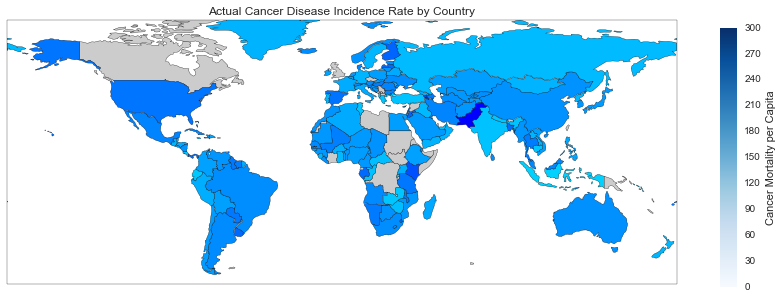

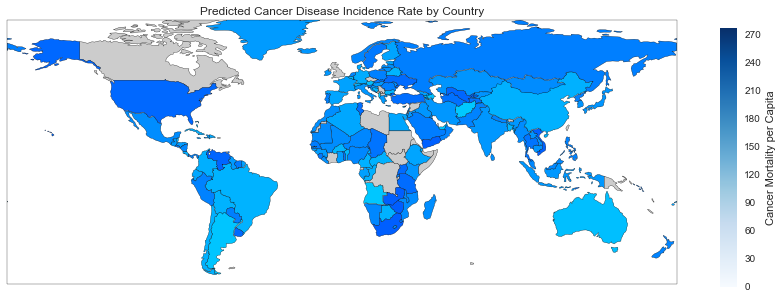

In [79]:
world_map_actual(cancer_rates, "Cancer", cancer_full)
world_map("Cancer", full_dataset, 1)

In [80]:
diabetes_2000[["Country", "Mortality"]]
diabetes_rates = diabetes_2000["Mortality"].as_matrix()
country_list_actual = diabetes_2000["Country"].as_matrix()
change_names(country_list_actual)
diabetes_full = np.column_stack((country_list_actual, diabetes_rates))

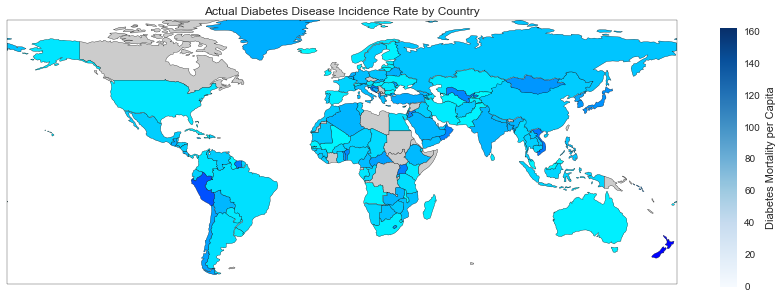

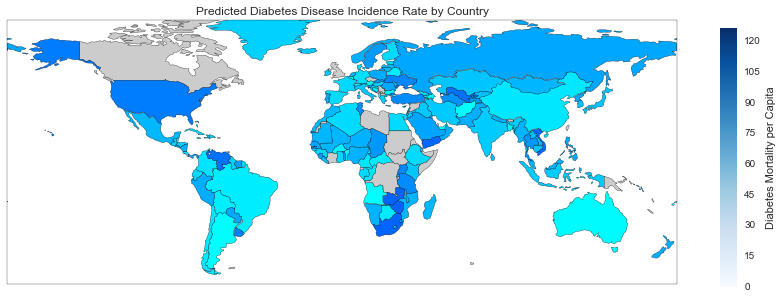

In [81]:
world_map_actual(diabetes_rates, "Diabetes", diabetes_full)
world_map("Diabetes", full_dataset, 2)

In [82]:
cardio_2000[["Country", "Mortality"]]
cardio_rates = cardio_2000["Mortality"].as_matrix()
country_list_actual = cardio_2000["Country"].as_matrix()
change_names(country_list_actual)
cardio_full = np.column_stack((country_list_actual, cardio_rates))

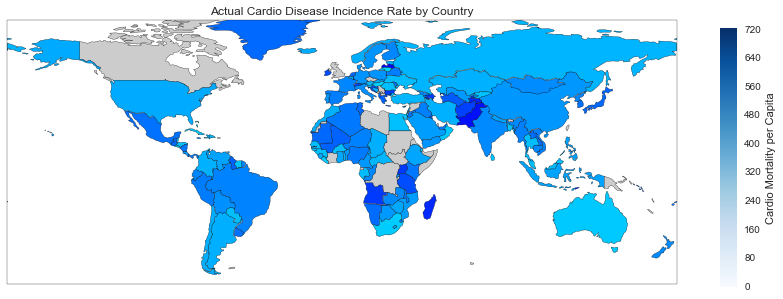

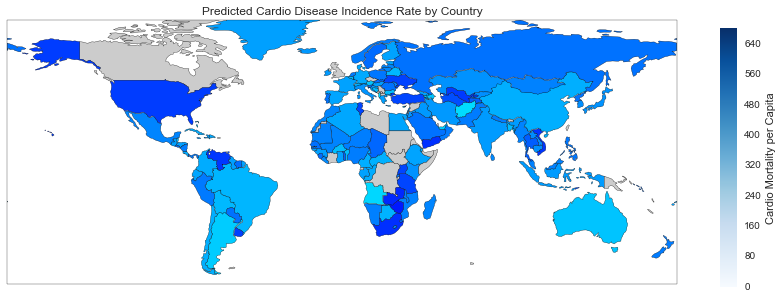

In [83]:
world_map_actual(cardio_rates, "Cardio", cardio_full)
world_map("Cardio", full_dataset, 3)

# Predictor Impact Analysis

d3 Code for visualizing the impact of cancer predictors, written in JavaScript:

In [44]:
print 'Impact of Food Predictors on Cancer:'
Image(url= "http://i.imgur.com/AplbAx9.png", width=300)

Impact of Food Predictors on Cancer:


d3 Code for visualizing the impact of diabetes predictors, written in JavaScript:

In [46]:
print 'Impact of Food Predictors on Diabetes:'
Image(url= "http://i.imgur.com/6hkXtG4.png", width=300)

Impact of Food Predictors on Diabetes:


d3 Code for visualizing the impact of cardiovascular disease predictors, written in JavaScript:

In [45]:
from IPython.display import Image
from IPython.core.display import HTML 
print 'Impact of Food Predictors on Cardiovascular Disease:'
Image(url= "http://i.imgur.com/fD1W1tl.png", width=300)

Impact of Food Predictors on Cardiovascular Disease:


---